# **Sobel edge detection**

### *Definition*

Sobel edge detection is a commonly used technique for detecting edges in digital images. It is named after its inventor, Irwin Sobel, and works by calculating the gradient of the image intensity at each pixel to detect the edges.

### *How the algorithm works?*

The process of Sobel edge detection involves convolving the image with two 3x3 kernels in the $x$ and $y$ directions ($G_x$ and $G_y$ respectively - on the image below). These kernels are designed to detect horizontal and vertical changes in the image intensity, which correspond to edges in the image. Therefore, the result of the convolution with the Sobel $x$-direction kernel ($G_x$) produces an image that emphasizes edges that are vertical, while the result of the convolution with the Sobel $y$-direction kernel ($G_y$) produces an image that emphasizes edges that are horizontal.

The kernels are applied to the image using convolution, which involves sliding the kernel over each pixel in the image and computing the sum of the element-wise product of the kernel and the corresponding pixels in the neighborhood. The resulting value is assigned to the central pixel in the output image, which represents the gradient magnitude at that location.

$$
|\mathbf{G}| = \sqrt{G_x^2 + G_y^2}
$$

or the approximate magnitude: (faster to compute)

$$
|\mathbf{G}| = |G_x| + |G_y|
$$

After computing the gradient magnitude, a threshold can be applied to the output image to identify the edge pixels.

### *Result*

The resulting image from the Sobel edge detection process shows the locations of edges in the image as bright regions. The magnitude of the brightness at each location corresponds to the strength of the edge.

The Sobel edge detection algorithm is simple, fast, and effective for detecting edges in images with simple and well-defined edges. However, it may produce false positives or miss some edges in images with complex and noisy backgrounds.

### *Implementation*

### **Step 1:** import libraries and load an image

In [15]:
!pip3 install tensorflow

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import cv2 as cv
import math
from scipy import ndimage
from scipy.signal import convolve2d


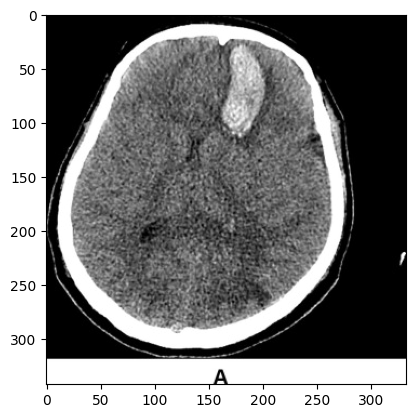

In [36]:
image = cv.imread('image.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')


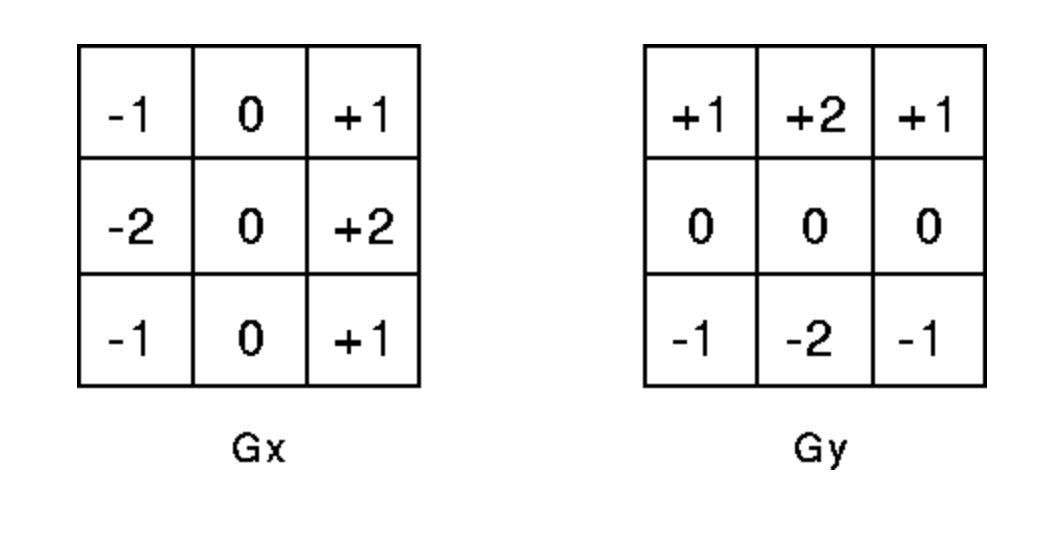


### **Step 2**: implement an algorithm using built-in functions

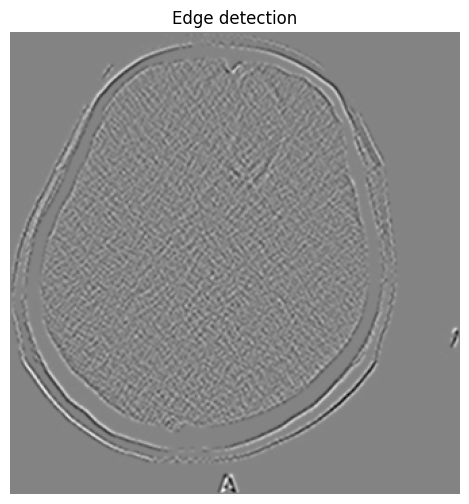

In [33]:
def detector_sobel_x_y(img):
  sobel_x_y = cv.Sobel(src=img, ddepth=cv.CV_64F, dx=1, dy=1, ksize=5)
  return sobel_x_y
sobel = detector_sobel_x_y(image)
plt.figure(figsize=(8, 6))
plt.imshow(sobel,cmap = 'gray')
plt.title('Edge detection')
plt.axis('off') 
plt.show()

### **Step 3:** implement an algorithm manually

In [31]:
def convolve2D(image, kernel):
    """Convolve a 2D image with a given kernel using scipy's convolve2d."""
    # Ensure kernel is a numpy array to avoid type issues
    kernel = np.array(kernel)
    # Flip the kernel for convolution
    kernel = np.flipud(np.fliplr(kernel))
    # Perform convolution using 'valid' to avoid padding effects
    return convolve2d(image, kernel, mode='same', boundary='fill', fillvalue=0)

def detector_manualy_sobel_x_y(img):
    if img.ndim != 2:
        raise ValueError("Input image must be a 2D array.")

    # Sobel kernels defined as numpy arrays
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]])
    sobel_y = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]])

    # Convolve with Sobel kernels
    sobel_x_output = convolve2D(img, sobel_x)
    sobel_y_output = convolve2D(img, sobel_y)

    # Combine x and y gradients
    sobel_x_y = np.sqrt(sobel_x_output**2 + sobel_y_output**2)

    # Display results
    plt.subplot(2,2,1),plt.imshow(img, cmap='gray')
    plt.title('Original'), plt.xticks([]), plt.yticks([])

    plt.subplot(2,2,2),plt.imshow(sobel_x_output, cmap='gray')
    plt.title('Sobel x'), plt.xticks([]), plt.yticks([])

    plt.subplot(2,2,3),plt.imshow(sobel_y_output, cmap='gray')
    plt.title('Sobel y'), plt.xticks([]), plt.yticks([])
    plt.show()

    return sobel_x_y

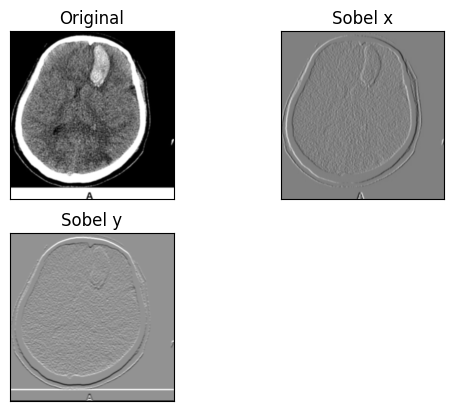

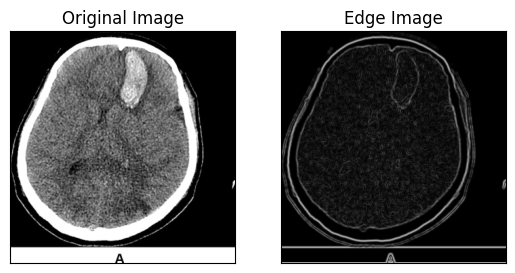

In [32]:

blurred3 = cv.GaussianBlur(image, (3, 3), 0)



sobel_edges = detector_manualy_sobel_x_y(blurred3)
# plt.imshow(sobel_edge_detector_applies, cmap = 'gray'),plt.title('Sobel')

plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(sobel_edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()